In [15]:
import requests
import json
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, Markdown

In [16]:
tipos = []
quantTipos = []
anos = []
quantAno = []
projZero = 0
acimaTeto = 0

totalUrl = 'http://api.salic.cultura.gov.br/v1/projetos/?format=json&'
res = requests.get(totalUrl)
res = json.loads(res.content.decode('utf-8'))
tot=res['total']
tot -= 2

carnaval = 0
totCarnaval = 0

url = 'http://api.salic.cultura.gov.br/v1/projetos/?offset='
url2 = '&format=json&'
totalAprovado = 0
totalSolicitado = 0

In [17]:
for x in range(0,tot,100):
    print(x)
    res = requests.get(url+str(x)+url2)
    res = json.loads(res.content.decode('utf-8'))
    proj = res['_embedded']['projetos']
    for d in range(len(proj)):
        nome = res['_embedded']['projetos'][d]['nome']
        projeto = res['_embedded']['projetos'][d]['area']
        ano = res['_embedded']['projetos'][d]['ano_projeto']
        cgccpf = res['_embedded']['projetos'][d]['cgccpf']
       
        #Verifica valores solicitados e aprovados de cada projeto   
        valorAprovado = float(res['_embedded']['projetos'][d]['valor_aprovado'])
        valorSolicitado = float(res['_embedded']['projetos'][d]['valor_proposta'])
        ano = res['_embedded']['projetos'][d]['ano_projeto']
        
        #Quantidade de projetos com valor solicitado igual a 0
        if(valorSolicitado>1):
            projZero += 1
            
        if((len(cgccpf)>=13 and valorAprovado>10000000) or (len(cgccpf)==11 and valorAprovado>700000)):
            acimaTeto += 1
            print('Projeto acima do teto:')
            print("------Nome: "+nome)
            print("------CPF ou CNPJ: ",cgccpf)
            print("------Valor aprovado: ",valorAprovado)
        
        #Separa e quantifica projetos de ocordo com os tipos
        if(projeto not in tipos):
            tipos.append(projeto)
            quantTipos.append(1)
        else:
            z = tipos.index(projeto)
            quantTipos[z] += 1
            
        if(ano not in anos):
            anos.append(ano)
            quantAno.append(valorAprovado)
        else:
            i = anos.index(ano)
            quantAno[i] += valorAprovado
       

        #Soma total repassado para carnaval de 2019
        if(('carnaval' in nome.lower() or 'carnaval' in str(projeto).lower()) and ('2019' in nome.lower()) and (int(ano)>=18)):
            
            carnaval += 1
            totCarnaval += valorAprovado
        
        #Imprime projetos a a cada 2000 resultados obtidos
        if(x%2000==0):
            #Exibe resultados
            print("ID: ",d+(x))
            print("Nome do projeto: ",nome)
            print("Área do projeto: ",projeto)


            print("Total Solicitado: %.2f" %valorSolicitado)
            print("Total Aprovado: %.2f" %valorAprovado)

        totalSolicitado+=float(valorSolicitado)            
        totalAprovado+=float(valorAprovado)

0
ID:  0
Nome do projeto:  indaiá
Área do projeto:  Artes Visuais
Total Solicitado: 370872.70
Total Aprovado: 0.00
ID:  1
Nome do projeto:  A[R]MAR em Belo Horizonte
Área do projeto:  Artes Cênicas
Total Solicitado: 358753.73
Total Aprovado: 0.00
ID:  2
Nome do projeto:  Semana Nacional da Imigração Chinesa no Brasil
Área do projeto:  Artes Cênicas
Total Solicitado: 4291887.75
Total Aprovado: 0.00
ID:  3
Nome do projeto:  FestArtGym
Área do projeto:  Artes Cênicas
Total Solicitado: 540749.00
Total Aprovado: 0.00
ID:  4
Nome do projeto:  Somos Mães: do laço ao abraço
Área do projeto:  Artes Visuais
Total Solicitado: 1183611.83
Total Aprovado: 0.00
ID:  5
Nome do projeto:  Festival Crise de Riso
Área do projeto:  Artes Cênicas
Total Solicitado: 358284.85
Total Aprovado: 0.00
ID:  6
Nome do projeto:  FLORES DO CEARÁ E SUAS INFLUÊNCIAS NA CULTURA
Área do projeto:  Humanidades
Total Solicitado: 372672.05
Total Aprovado: 0.00
ID:  7
Nome do projeto:  Escola de Cultura SESI: Formação e aprimo

Projeto acima do teto:
------Nome: Cidades Culturais
------CPF ou CNPJ:  ***844918**
------Valor aprovado:  783337.5
Projeto acima do teto:
------Nome: Livrovoz - Audiolivros para todos
------CPF ou CNPJ:  ***853776**
------Valor aprovado:  728036.1
Projeto acima do teto:
------Nome: Vovô faz 70 anos (... e comemora do seu jeito)
------CPF ou CNPJ:  ***560798**
------Valor aprovado:  745173.0
200
Projeto acima do teto:
------Nome: Projeto Maná, Arte & Dança
------CPF ou CNPJ:  ***059108**
------Valor aprovado:  725481.9
Projeto acima do teto:
------Nome: Jovem Mágico Gabriel Montenegro
------CPF ou CNPJ:  ***517567**
------Valor aprovado:  1311403.65
Projeto acima do teto:
------Nome:  Festival Receita Cultural 
------CPF ou CNPJ:  ***257986**
------Valor aprovado:  700603.2
Projeto acima do teto:
------Nome: Chocopáscoa - Artes e reflexão
------CPF ou CNPJ:  ***454396**
------Valor aprovado:  924412.5
Projeto acima do teto:
------Nome: Lona Protetora 
------CPF ou CNPJ:  ***351888**
-

Projeto acima do teto:
------Nome: BENDITA 
------CPF ou CNPJ:  ***848057**
------Valor aprovado:  1333689.5
Projeto acima do teto:
------Nome: Formando Leitores, Mudando Histórias
------CPF ou CNPJ:  ***952987**
------Valor aprovado:  849197.25
1600
Projeto acima do teto:
------Nome: Turnê e DVD Théo Mello 
------CPF ou CNPJ:  ***324726**
------Valor aprovado:  883129.5
Projeto acima do teto:
------Nome: Circuito Cultural Sul
------CPF ou CNPJ:  ***748129**
------Valor aprovado:  1434510.0
Projeto acima do teto:
------Nome: A Escola do Rock
------CPF ou CNPJ:  16827643000143
------Valor aprovado:  12830083.32
Projeto acima do teto:
------Nome: Janela da História – Avenida Paulista
------CPF ou CNPJ:  ***507698**
------Valor aprovado:  707484.9
Projeto acima do teto:
------Nome: Restauração, Conservação e Modernização - Edifício e Acervo do MASP
------CPF ou CNPJ:  60664745000187
------Valor aprovado:  23828582.66
Projeto acima do teto:
------Nome: Maracatum
------CPF ou CNPJ:  ***4812

Projeto acima do teto:
------Nome: De Pequeno a Grande Otelo
------CPF ou CNPJ:  ***534066**
------Valor aprovado:  1265220.0
Projeto acima do teto:
------Nome: Plano Bienal de Atividades Culturais do PTI
------CPF ou CNPJ:  07769688000118
------Valor aprovado:  10545120.0
Projeto acima do teto:
------Nome: Viola Cabocla, um tributo a Tião Carreiro
------CPF ou CNPJ:  ***008001**
------Valor aprovado:  704516.0
Projeto acima do teto:
------Nome: Floripa Jazz Festival 2019
------CPF ou CNPJ:  ***507289**
------Valor aprovado:  1430895.38
Projeto acima do teto:
------Nome: Dress Tents 
------CPF ou CNPJ:  ***909068**
------Valor aprovado:  943551.36
2200
Projeto acima do teto:
------Nome: O PEQUENO PRINCIPE
------CPF ou CNPJ:  07031361000144
------Valor aprovado:  10209133.08
Projeto acima do teto:
------Nome: PROJETO MÚSICA NAS ESCOLAS DE BARRA MANSA - A ARTE DE EDUCAR ATRAVÉS DA MÚSICA - PLANO BIENAL 2019/2020
------CPF ou CNPJ:  17747426000106
------Valor aprovado:  18082945.17
Projet

Projeto acima do teto:
------Nome: LiteraTur
------CPF ou CNPJ:  ***847541**
------Valor aprovado:  754724.25
Projeto acima do teto:
------Nome: Plano Anual de Atividades MAM/SP 2019
------CPF ou CNPJ:  62520218000124
------Valor aprovado:  20339915.8
Projeto acima do teto:
------Nome: Projeto de Educação e Arte na Inclusão social  
------CPF ou CNPJ:  ***262606**
------Valor aprovado:  1410190.55
Projeto acima do teto:
------Nome: E-FESTIVAL INSTRUMENTAL
------CPF ou CNPJ:  65935280000175
------Valor aprovado:  10189715.0
Projeto acima do teto:
------Nome: DVD e Turnê Pedro Henrique e Daniel
------CPF ou CNPJ:  ***996476**
------Valor aprovado:  908657.25
3300
3400
3500
Projeto acima do teto:
------Nome: Billy Elliot
------CPF ou CNPJ:  16827643000143
------Valor aprovado:  16507889.63
Projeto acima do teto:
------Nome: Archetype
------CPF ou CNPJ:  ***094136**
------Valor aprovado:  1022782.5
3600
3700
3800
Projeto acima do teto:
------Nome: Primeiro Rodeio Regional de Jacarezinho .


Projeto acima do teto:
------Nome: Irracional - Um Musical Policial
------CPF ou CNPJ:  ***833428**
------Valor aprovado:  745098.32
Projeto acima do teto:
------Nome: Ruindade - Um Conto Musical
------CPF ou CNPJ:  ***833428**
------Valor aprovado:  728699.5
Projeto acima do teto:
------Nome: Plano Anual do Instituto Tomie Ohtake - 2019
------CPF ou CNPJ:  00984768000147
------Valor aprovado:  31441286.89
4200
Projeto acima do teto:
------Nome: DVD e Turnê Filipe e Diego
------CPF ou CNPJ:  ***860456**
------Valor aprovado:  829992.5
4300
Projeto acima do teto:
------Nome: Reconstrução do Teatro Cultura Artística - Segunda Fase
------CPF ou CNPJ:  60756178000199
------Valor aprovado:  97921867.07
Projeto acima do teto:
------Nome: Bibiana Bolacell Ao vivo em Goiânia (Tour)
------CPF ou CNPJ:  ***621760**
------Valor aprovado:  1499554.2
Projeto acima do teto:
------Nome: GRAVAÇÃO DE CD MC BOKCAUM
------CPF ou CNPJ:  ***006331**
------Valor aprovado:  1000678.55
4400
Projeto acima do t

6200
6300
Projeto acima do teto:
------Nome: Registro e Preservação Digital do Patrimônio Histórico. Nossas Memorias Compartilhadas e Preservadas em Definitivo.
------CPF ou CNPJ:  11316557000152
------Valor aprovado:  11195851.14
Projeto acima do teto:
------Nome: Desfiles Carnavalescos na Sapucai 2018
------CPF ou CNPJ:  28715167000158
------Valor aprovado:  15582199.53
Projeto acima do teto:
------Nome: Restauro e Ampliação do Museu Histórico e Pedagógico das Monções
------CPF ou CNPJ:  02414436000152
------Valor aprovado:  11723247.17
6400
6500
6600
6700
6800
Projeto acima do teto:
------Nome: CONSTRUÇÃO DE NOVO EQUIPAMENTO MUSEAL PARA AMPLIAÇÃO DO MUSEU SACRO FRANCISCANO
------CPF ou CNPJ:  14721347000138
------Valor aprovado:  52697403.0
6900
7000
7100
Projeto acima do teto:
------Nome: Restauro do Antigo Hospital Humberto Primo - SP
------CPF ou CNPJ:  06056498000190
------Valor aprovado:  26206582.11
7200
7300
Projeto acima do teto:
------Nome: VIVER DE NOVO
------CPF ou CNPJ: 

8200
Projeto acima do teto:
------Nome: MUSEU DA LÍNGUA PORTUGUESA – EXECUÇÃO DAS OBRAS DE ADAPTAÇÃO INTERNA
------CPF ou CNPJ:  29527413000100
------Valor aprovado:  29554333.02
Projeto acima do teto:
------Nome: PLANO ANUAL 2018 DA APAA - ASSOCIAÇÃO PAULISTA DOS AMIGOS DA ARTE
------CPF ou CNPJ:  06196001000130
------Valor aprovado:  10028687.5
8300
Projeto acima do teto:
------Nome: Restauração da Igreja de São Francisco e da Casa do Conde de Assumar para implantação do Museu de Mariana
------CPF ou CNPJ:  17643364000192
------Valor aprovado:  15315963.78
8400
Projeto acima do teto:
------Nome: Colégio Estadual Regente Feijó
------CPF ou CNPJ:  02392034000102
------Valor aprovado:  10002872.93
Projeto acima do teto:
------Nome: Colégio Estadual Moyses Lupion
------CPF ou CNPJ:  02392034000102
------Valor aprovado:  10594526.33
8500
Projeto acima do teto:
------Nome: Plano Bianual de Atividades do Instituto Baccarelli 2018/2019
------CPF ou CNPJ:  55446132000133
------Valor aprovado:

10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
ID:  12000
Nome do projeto:  Cabo Polônio &#x2013; o lugar onde se perdem as coisas
Área do projeto:  Artes Integradas
Total Solicitado: 0.00
Total Aprovado: 0.00
ID:  12001
Nome do projeto:  Plataforma de integração de eventos regionais (Feed Event)
Área do projeto:  Artes Integradas
Total Solicitado: 0.00
Total Aprovado: 0.00
ID:  12002
Nome do projeto:  A Profecia dos Príncipes Gêmeos
Área do projeto:  Artes Integradas
Total Solicitado: 0.00
Total Aprovado: 0.00
ID:  12003
Nome do projeto:  IMAGEM DOS POVOS - MULHERES
Área do projeto:  Artes Integradas
Total Solicitado: 0.00
Total Aprovado: 0.00
ID:  12004
Nome do projeto:  História da Arte em Quebra-Cabeça
Área do projeto:  Artes Integradas
Total Solicitado: 0.00
Total Aprovado: 0.00
ID:  12005
Nome do projeto:  Lilys Hair
Área do projeto:  Artes Integradas
Total Solicitado: 0.00
Total Aprovado: 0.00
ID:  12006
Nome do 

12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
Projeto acima do teto:
------Nome: Plano Anual 2018 da Pinacoteca de São Paulo 
------CPF ou CNPJ:  96290846000182
------Valor aprovado:  16084372.0
13400
Projeto acima do teto:
------Nome: Obra de Restauração e Conservação do Edifício BEMGE
------CPF ou CNPJ:  26001007000111
------Valor aprovado:  26161487.46
Projeto acima do teto:
------Nome: Plano Anual de Atividades MAM/SP 2018
------CPF ou CNPJ:  62520218000124
------Valor aprovado:  19726804.49
13500
Projeto acima do teto:
------Nome: IMPLANTAÇÃO DO MUSEU JUDAICO 
------CPF ou CNPJ:  04414533000170
------Valor aprovado:  12943694.75
13600
Projeto acima do teto:
------Nome: Plano Anual do Instituto Tomie Ohtake - 2018
------CPF ou CNPJ:  00984768000147
------Valor aprovado:  37927023.1
Projeto acima do teto:
------Nome: Colégio Estadual do Paraná
------CPF ou CNPJ:  02392034000102
------Valor aprovado:  24161977.05
13700
13800
13900
14000
ID:  14000
Nome do pr

14200
14300
Projeto acima do teto:
------Nome: SÃO JOÃO DE CARUARU CULTURAL
------CPF ou CNPJ:  01374871000138
------Valor aprovado:  10316564.57
14400
14500
14600
14700
14800
14900
15000
15100
15200
Projeto acima do teto:
------Nome: Conservação Emergencial dos Edifícios do Pátio Ferroviário de Paranapiacaba
------CPF ou CNPJ:  49731466000156
------Valor aprovado:  18150991.67
15300
15400
15500
Projeto acima do teto:
------Nome: OPEN AIR 2017
------CPF ou CNPJ:  05320143000102
------Valor aprovado:  10070832.0
15600
15700


KeyboardInterrupt: 

Total solicitado: 13271442533.00
Total Aprovado: 12346586712.22
 ------ 



## Projeto relacionados ao carnaval 2019: 39
## Valor aprovado para projetos do carnaval 2019: 77596169.76 de reais


 ------ 
Quantidade de projetos solicitados com valor R$0:  10941
 ------ 
Considerando teto de R$10.000.000,00 para empresas e R$700.000,00 para pessoas físicas
Quantidade de valores aprovados acima do teto:  248
 ------ 


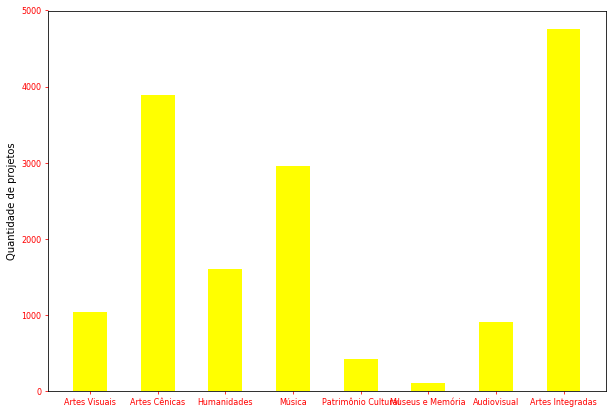

Artes Visuais  :  1037
Artes Cênicas  :  3894
Humanidades  :  1607
Música  :  2955
Patrimônio Cultural  :  428
Museus e Memória  :  110
Audiovisual  :  912
Artes Integradas  :  4757


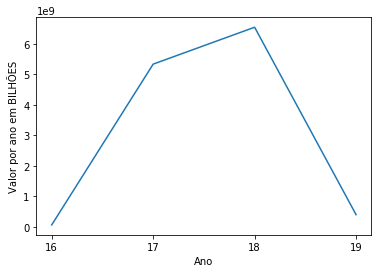

Ano : Valor Aprovado
16 : R$ 64439243.77
17 : R$ 5336147359.61
18 : R$ 6545682066.52
19 : R$ 400318042.32


In [22]:
print("Total solicitado: %.2f" %totalSolicitado)
print("Total Aprovado: %.2f" %totalAprovado)

invQuantAno = []
invAno = []
for x in reversed(quantAno):
    invQuantAno.append(x)

for x in reversed(anos):
    invAno.append(x)

print(" ------ ")
display(Markdown("""
## Projeto relacionados ao carnaval 2019: {carnaval}
## Valor aprovado para projetos do carnaval 2019: {totCarnaval} de reais
""".format(carnaval=carnaval, totCarnaval=totCarnaval)))
print(" ------ ")
print("Quantidade de projetos solicitados com valor R$0: ",projZero)
print(" ------ ")
print("Considerando teto de R$10.000.000,00 para empresas e R$700.000,00 para pessoas físicas")
print("Quantidade de valores aprovados acima do teto: ",acimaTeto)
print(" ------ ")

plt.figure(figsize=(10,7))
plt.ylabel('Quantidade de projetos')
plt.bar(tipos,quantTipos,width=0.5, color='yellow')
plt.tick_params(length=3,labelsize=8,colors='r',
               grid_color='r', grid_alpha=0.5)
plt.show()
for x in range(len(tipos)):
    print(tipos[x]," : ",quantTipos[x])

plt.plot(invAno,invQuantAno)
plt.ylabel('Valor por ano em BILHÕES')
plt.xlabel('Ano')
plt.show()
print("Ano : Valor Aprovado")
for x in range(len(invQuantAno)):
    print(invAno[x],": R$ %.2f" %invQuantAno[x])